# URLのページのワードクラウドを作る 

まずはライブラリをインポート

In [1]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import requests
import MeCab as mc
import sys

In [2]:
def mecab_analysis(text):
    
    t = mc.Tagger("-Ochasen")
    enc_text = text
    #print(enc_text)
    node = t.parseToNode(enc_text) 


    output = []
    while(node):
        if node.surface != "":  # ヘッダとフッタを除外
            word_type = node.feature.split(",")[0]
            if word_type in ["形容詞", "動詞","名詞", "副詞"]:
                output.append(node.surface)
        node = node.next
        if node is None:
            break
    #print(output)
    return output

In [3]:
def get_wordlist_from_URL(url):
    
    res = requests.get(url)
    #print("1",res.encoding)
    #文字コード変換
    res.encoding = res.apparent_encoding
    #print("2",res.encoding)
    soup = BeautifulSoup(res.text)
    #print(soup.body)
    if (soup.body.section is None):
        text = soup.body.get_text().replace('\n','').replace('\t','')
    else:
        text = soup.body.section.get_text().replace('\n','').replace('\t','')
    #print(text)
    return mecab_analysis(text)

In [4]:
def create_wordcloud(text):

    font="/System/Library/Fonts/ヒラギノ角ゴシック W0.ttc"# 適宜ご変更ください

    # ストップワードの設定
    stop_words = [ u'てる', u'いる', u'なる', u'れる', u'する', u'ある', u'こと', u'これ', u'さん', u'して', \
             u'くれる', u'やる', u'くださる', u'そう', u'せる', u'した',  u'思う',  \
             u'それ', u'ここ', u'ちゃん', u'くん', u'', u'て',u'に',u'を',u'は',u'の', u'が', u'と', u'た', u'し', u'で', \
             u'ない', u'も', u'な', u'い', u'か', u'ので', u'よう', u'', \
             u'たとえば', u'特に', u'られ', u'さらに', u'よって', u'したがって', u'もの', u'これ', u'これら', u'あれら']

    wordcloud = WordCloud(background_color="white", font_path=font, width=900, height=700, \
                          stopwords=set(stop_words)).generate(text)

    plt.figure(figsize=(15,12), dpi=300)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

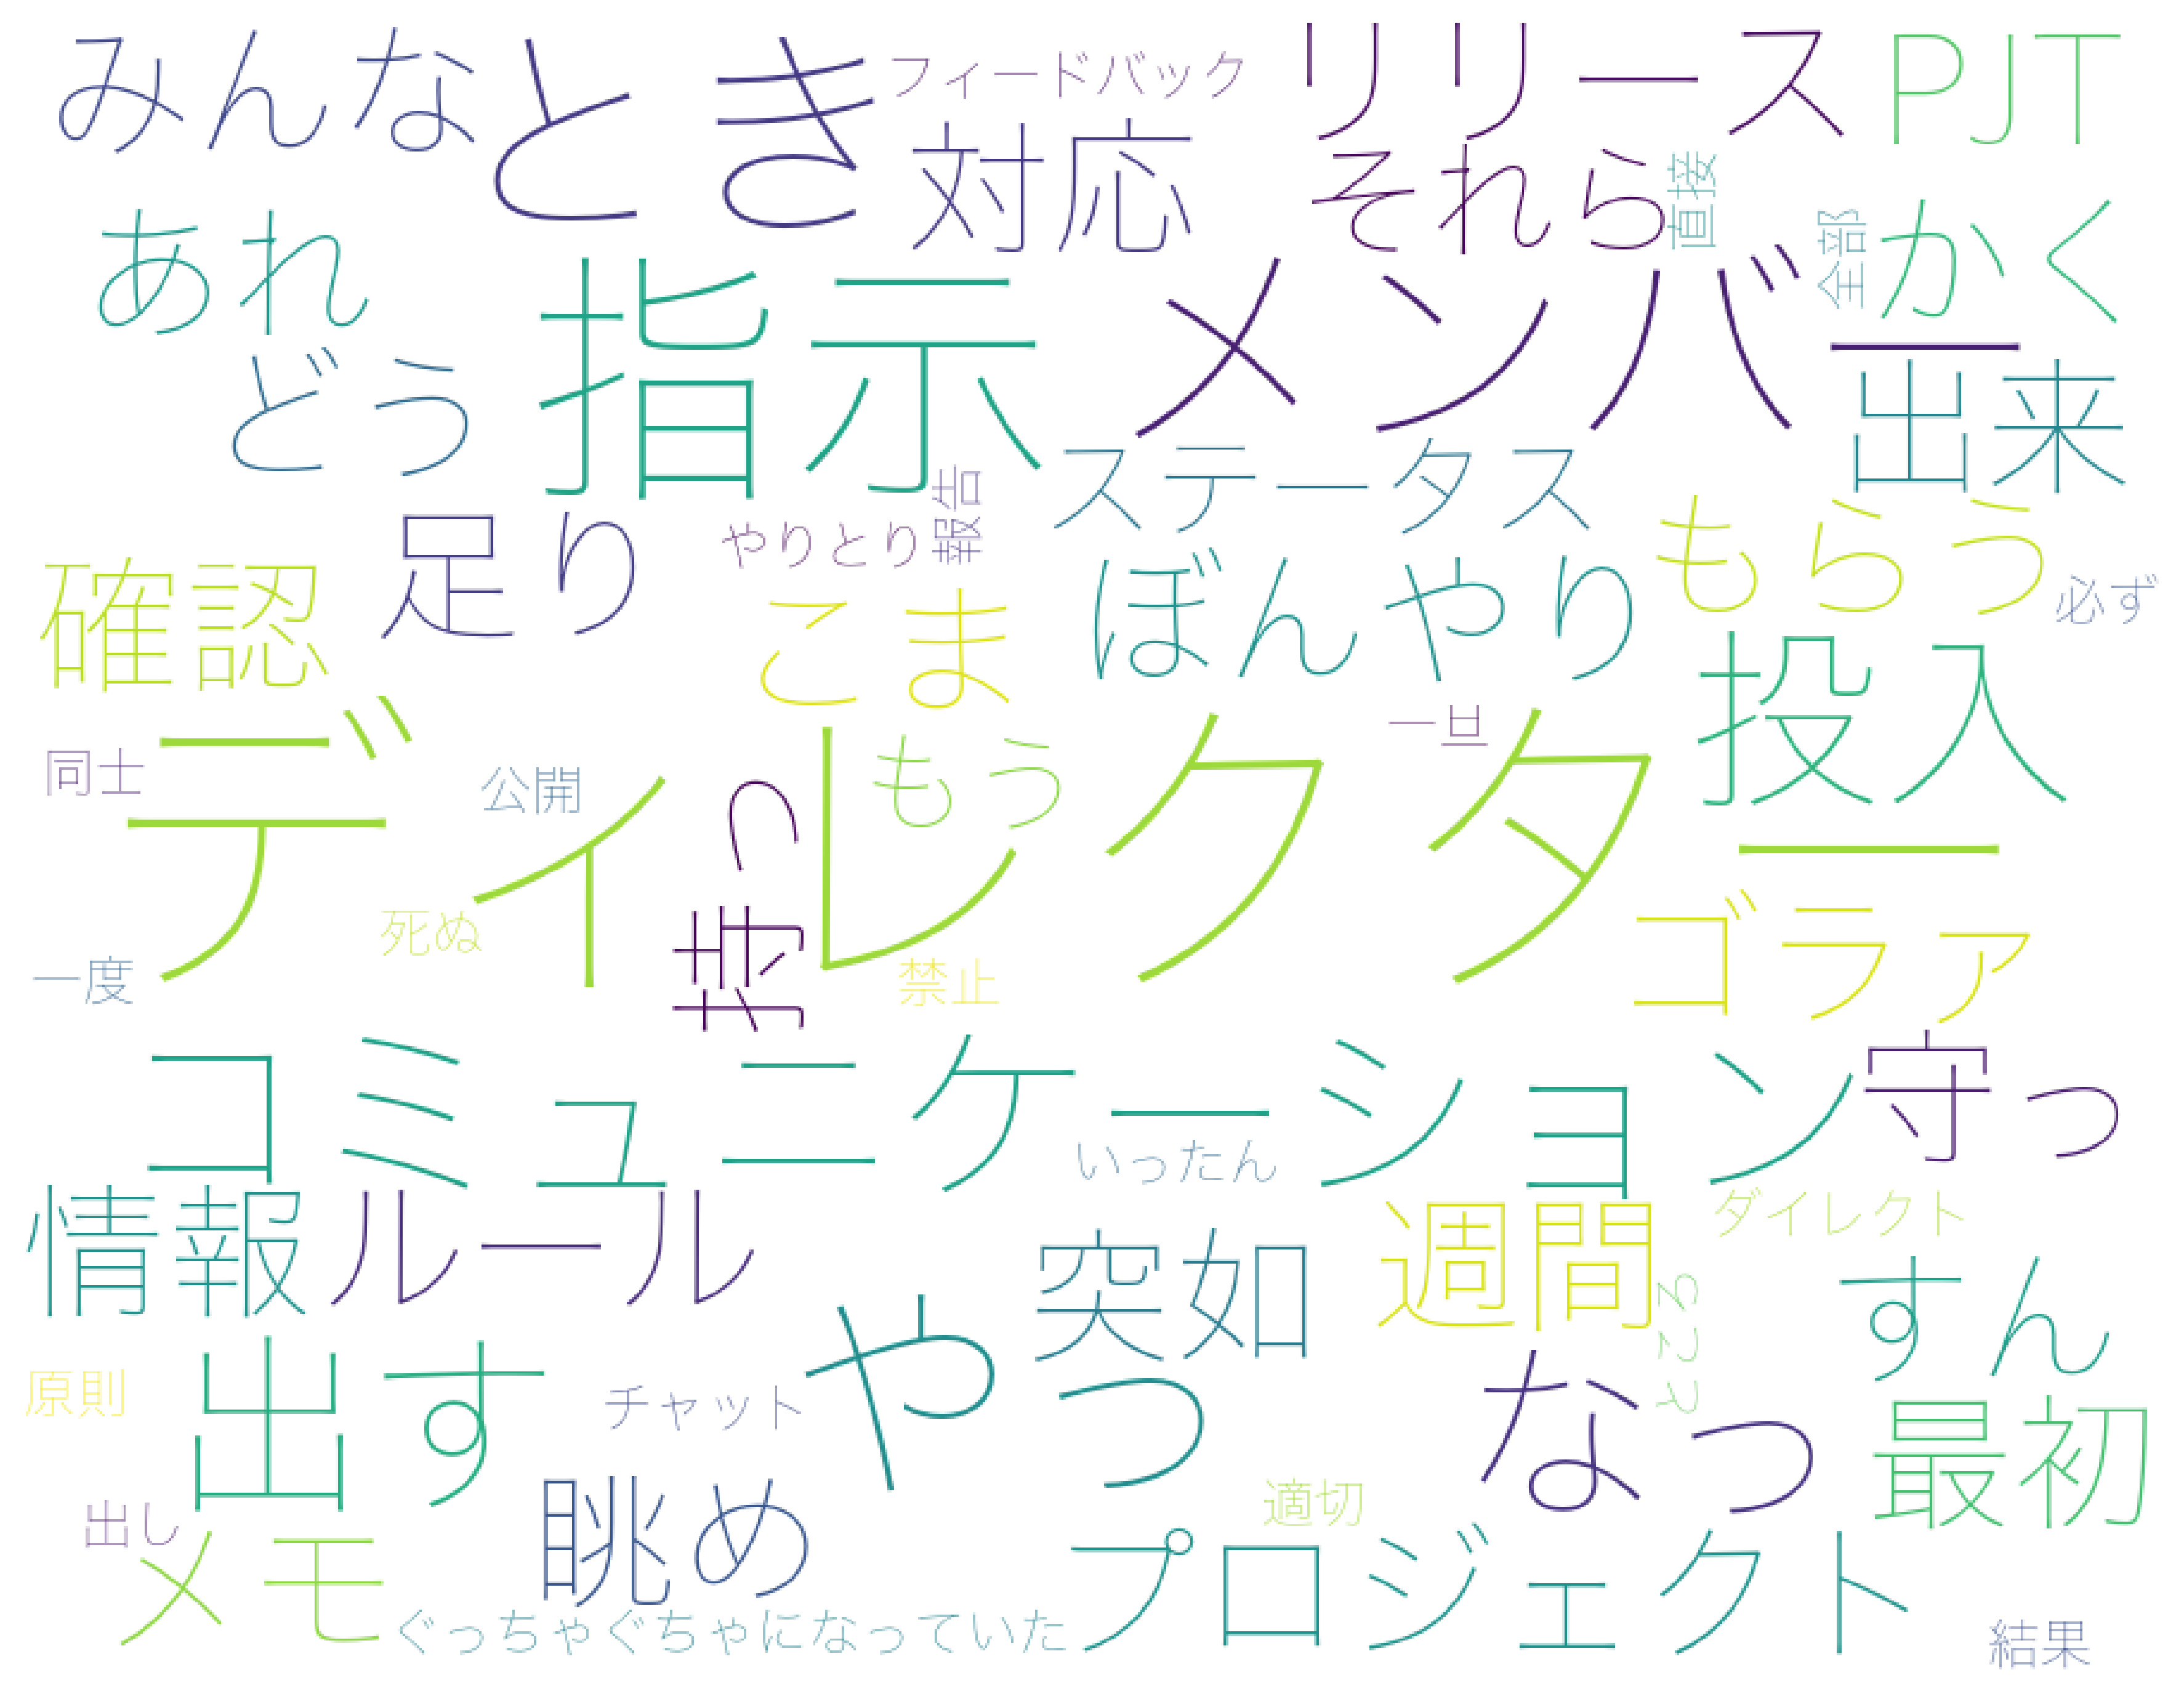

In [5]:
url = "http://qiita.com/t_saeko/items/2b475b8657c826abc114"
wordlist = get_wordlist_from_QiitaURL(url)
#print(" ".join(wordlist))
create_wordcloud(" ".join(wordlist))

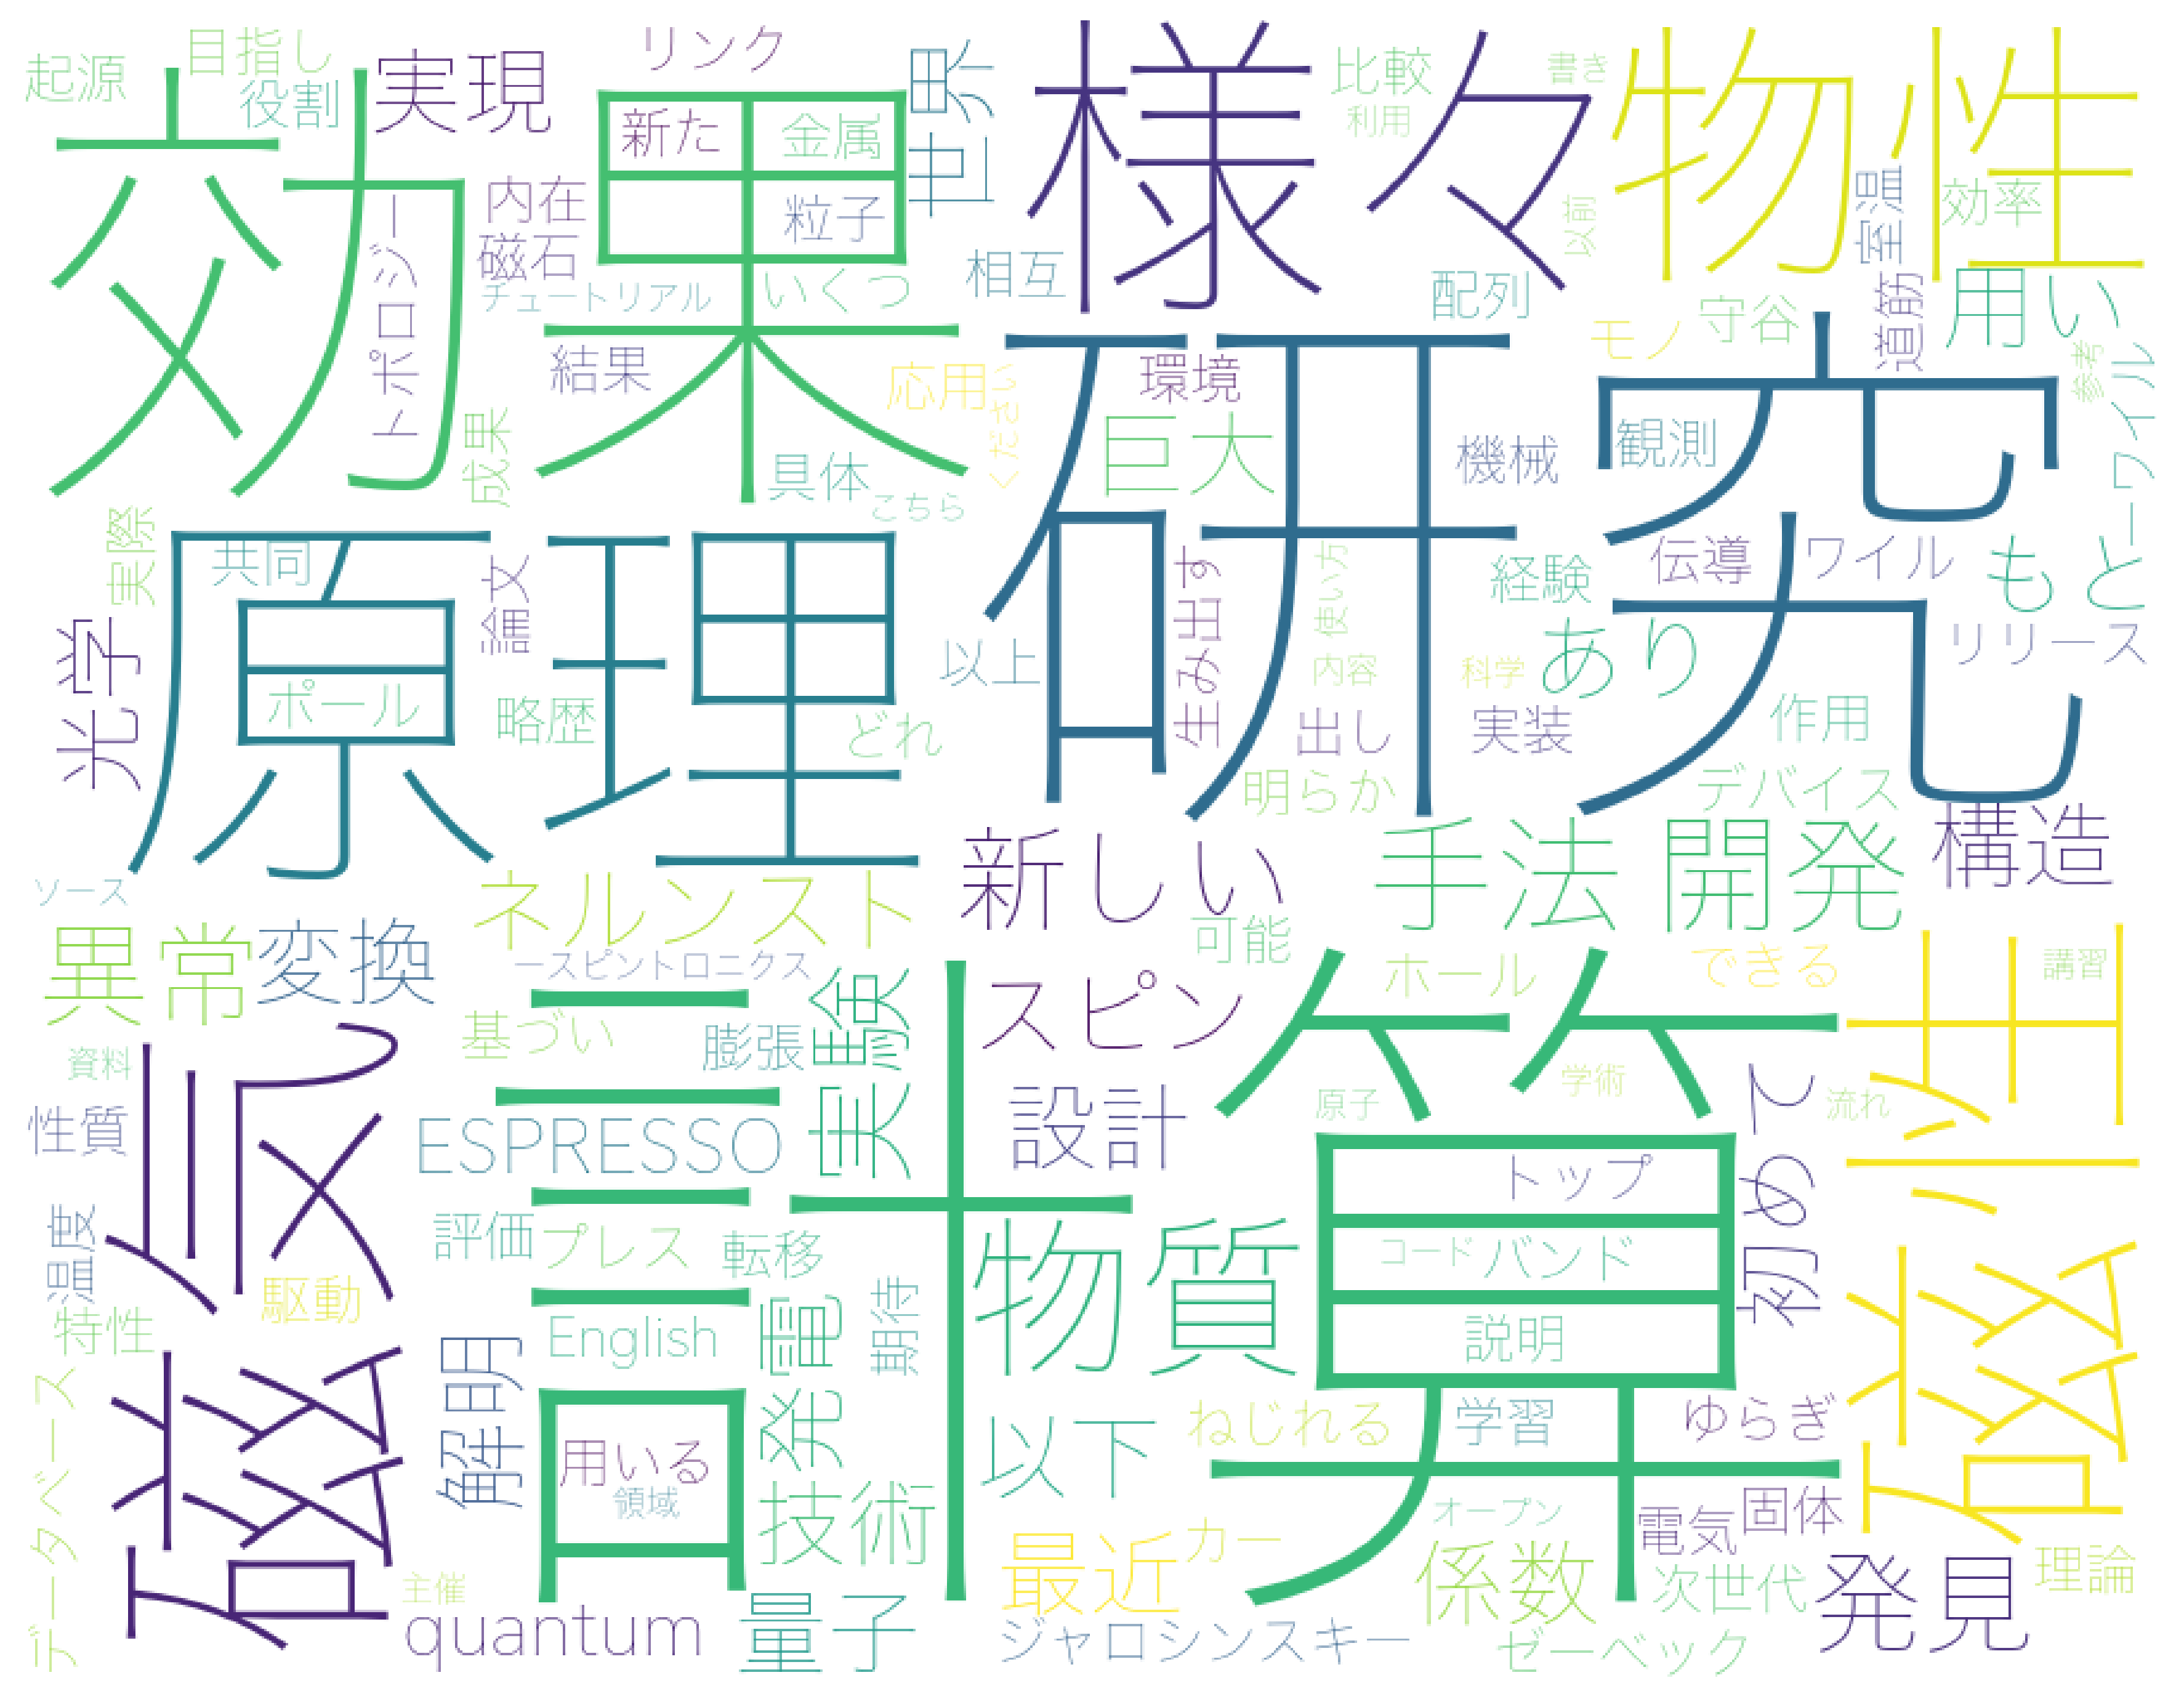

In [6]:
url = "http://www.cmpt.phys.tohoku.ac.jp/~koretsune/research_j.html"
wordlist = get_wordlist_from_QiitaURL(url)
#print(" ".join(wordlist))
create_wordcloud(" ".join(wordlist))

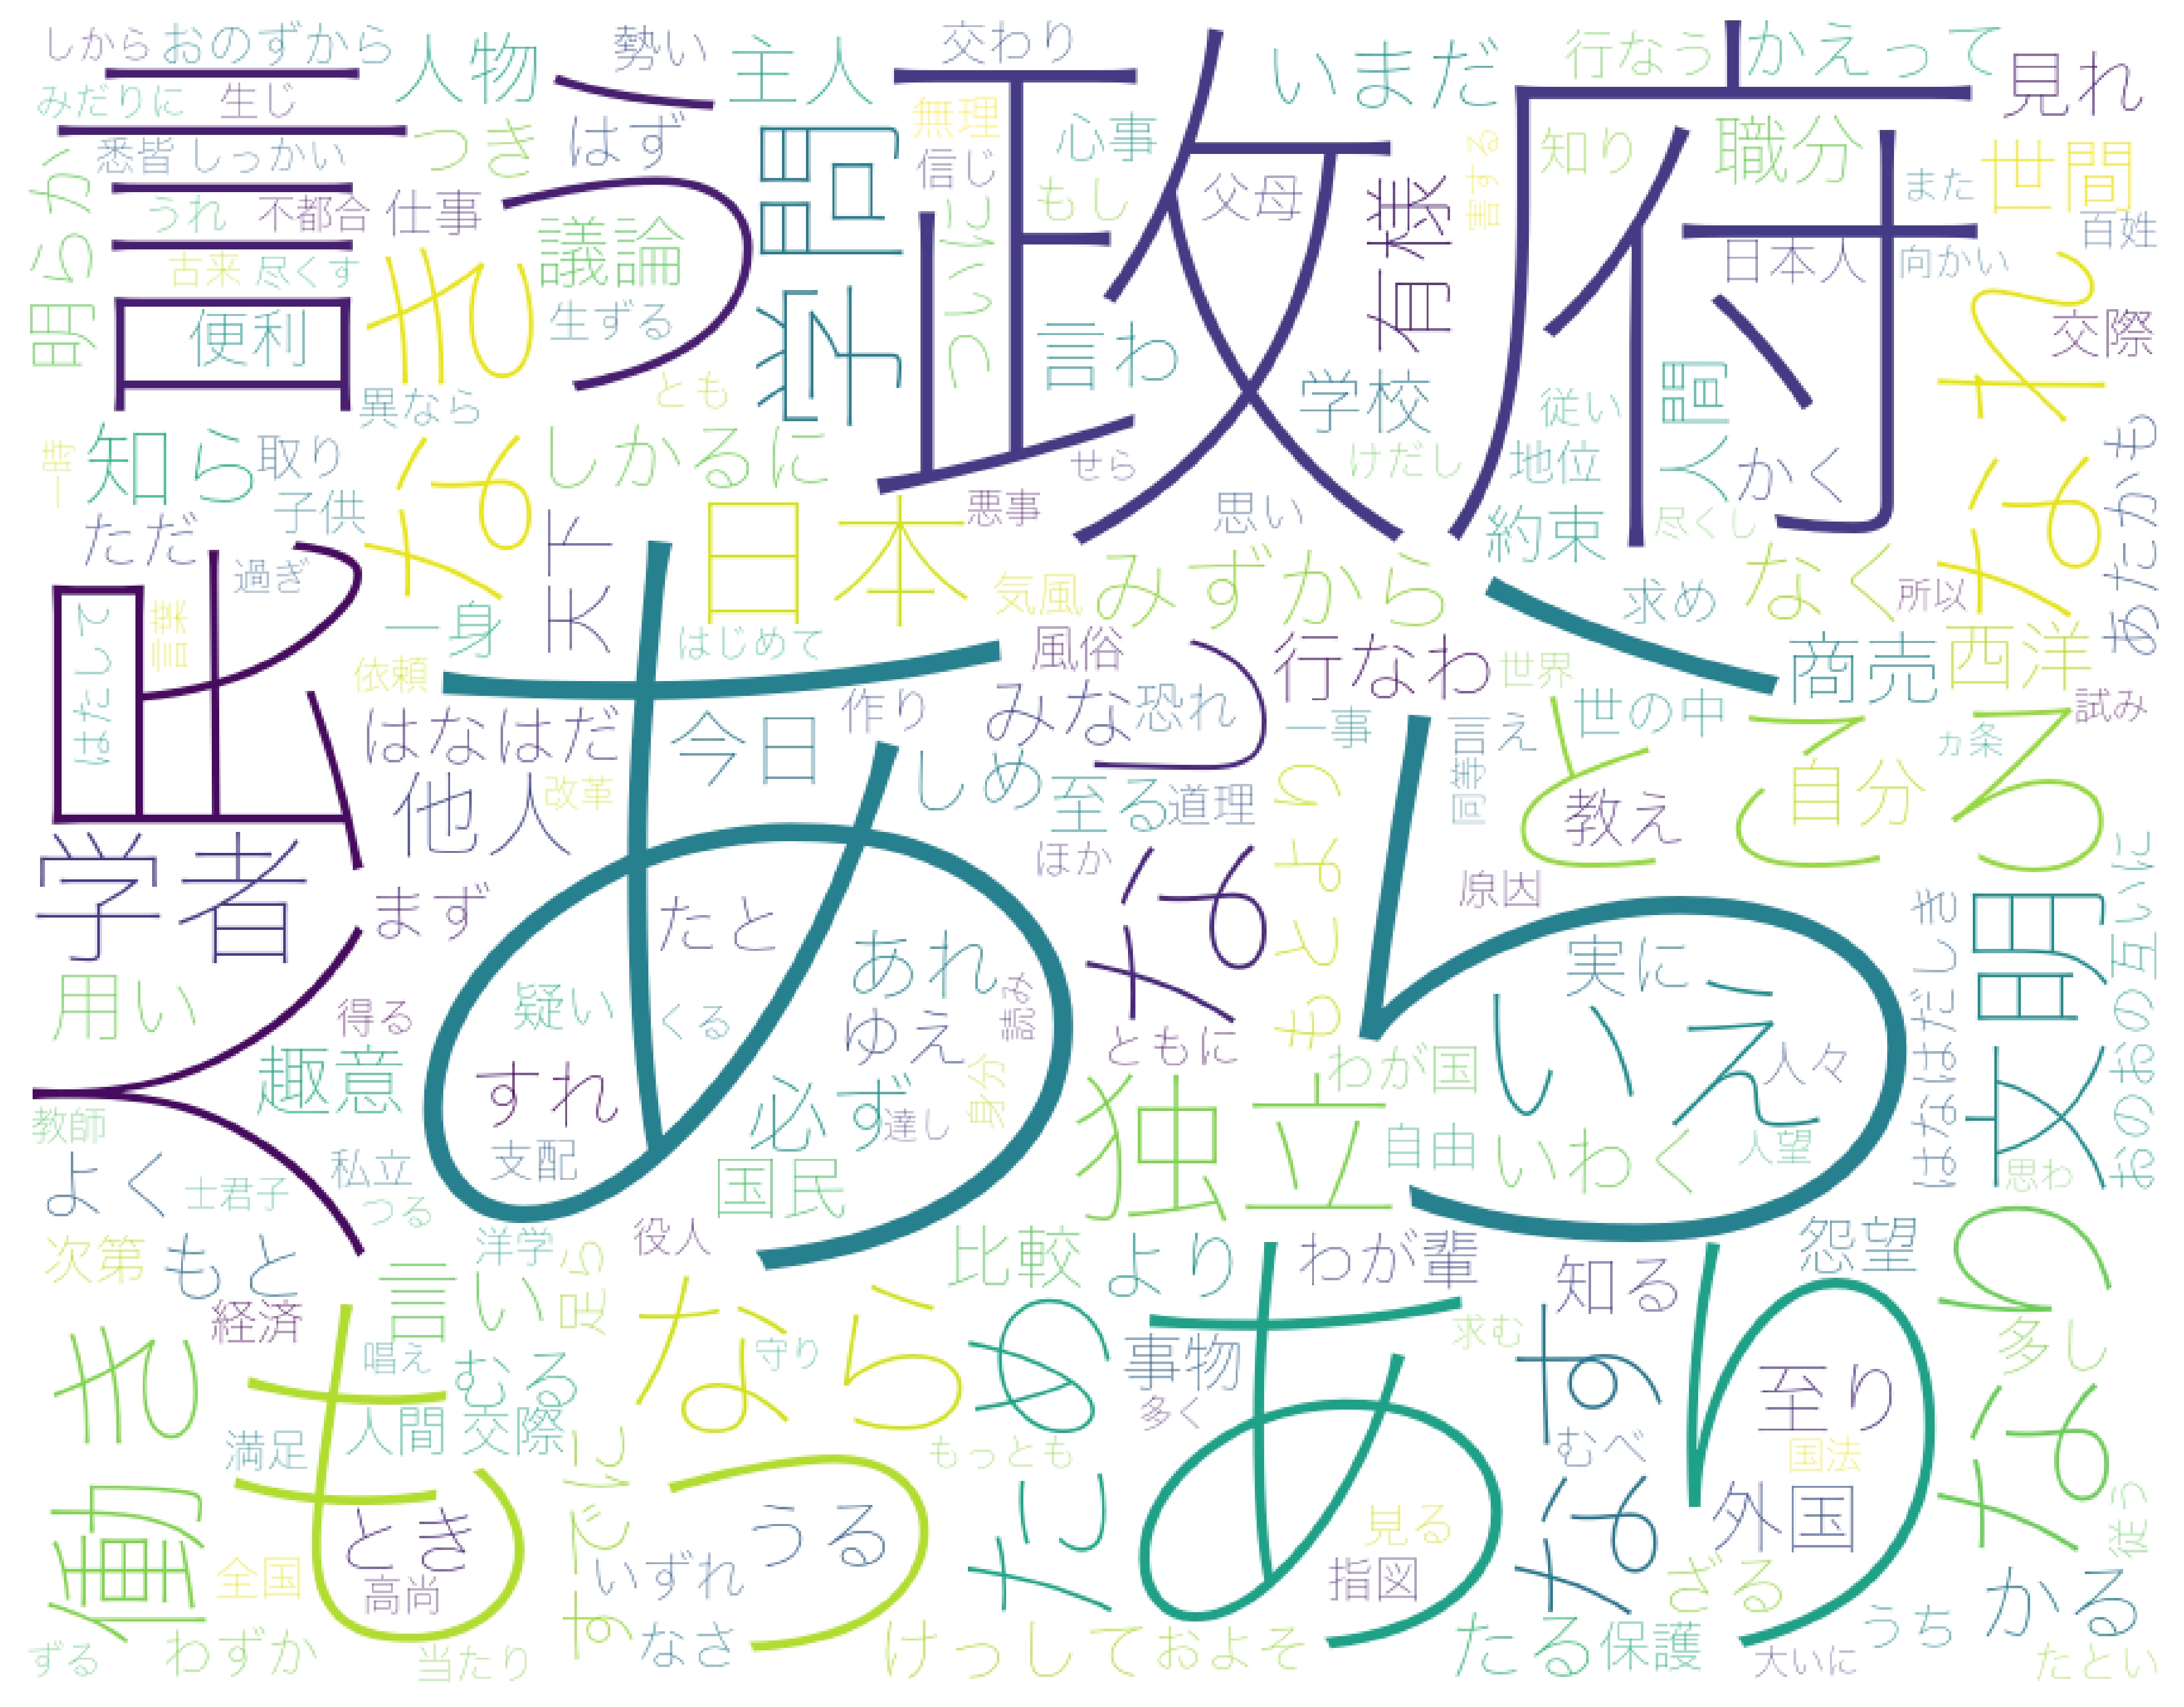

In [7]:
url = "https://www.aozora.gr.jp/cards/000296/files/47061_29420.html"
wordlist = get_wordlist_from_QiitaURL(url)
#print(" ".join(wordlist))
create_wordcloud(" ".join(wordlist))

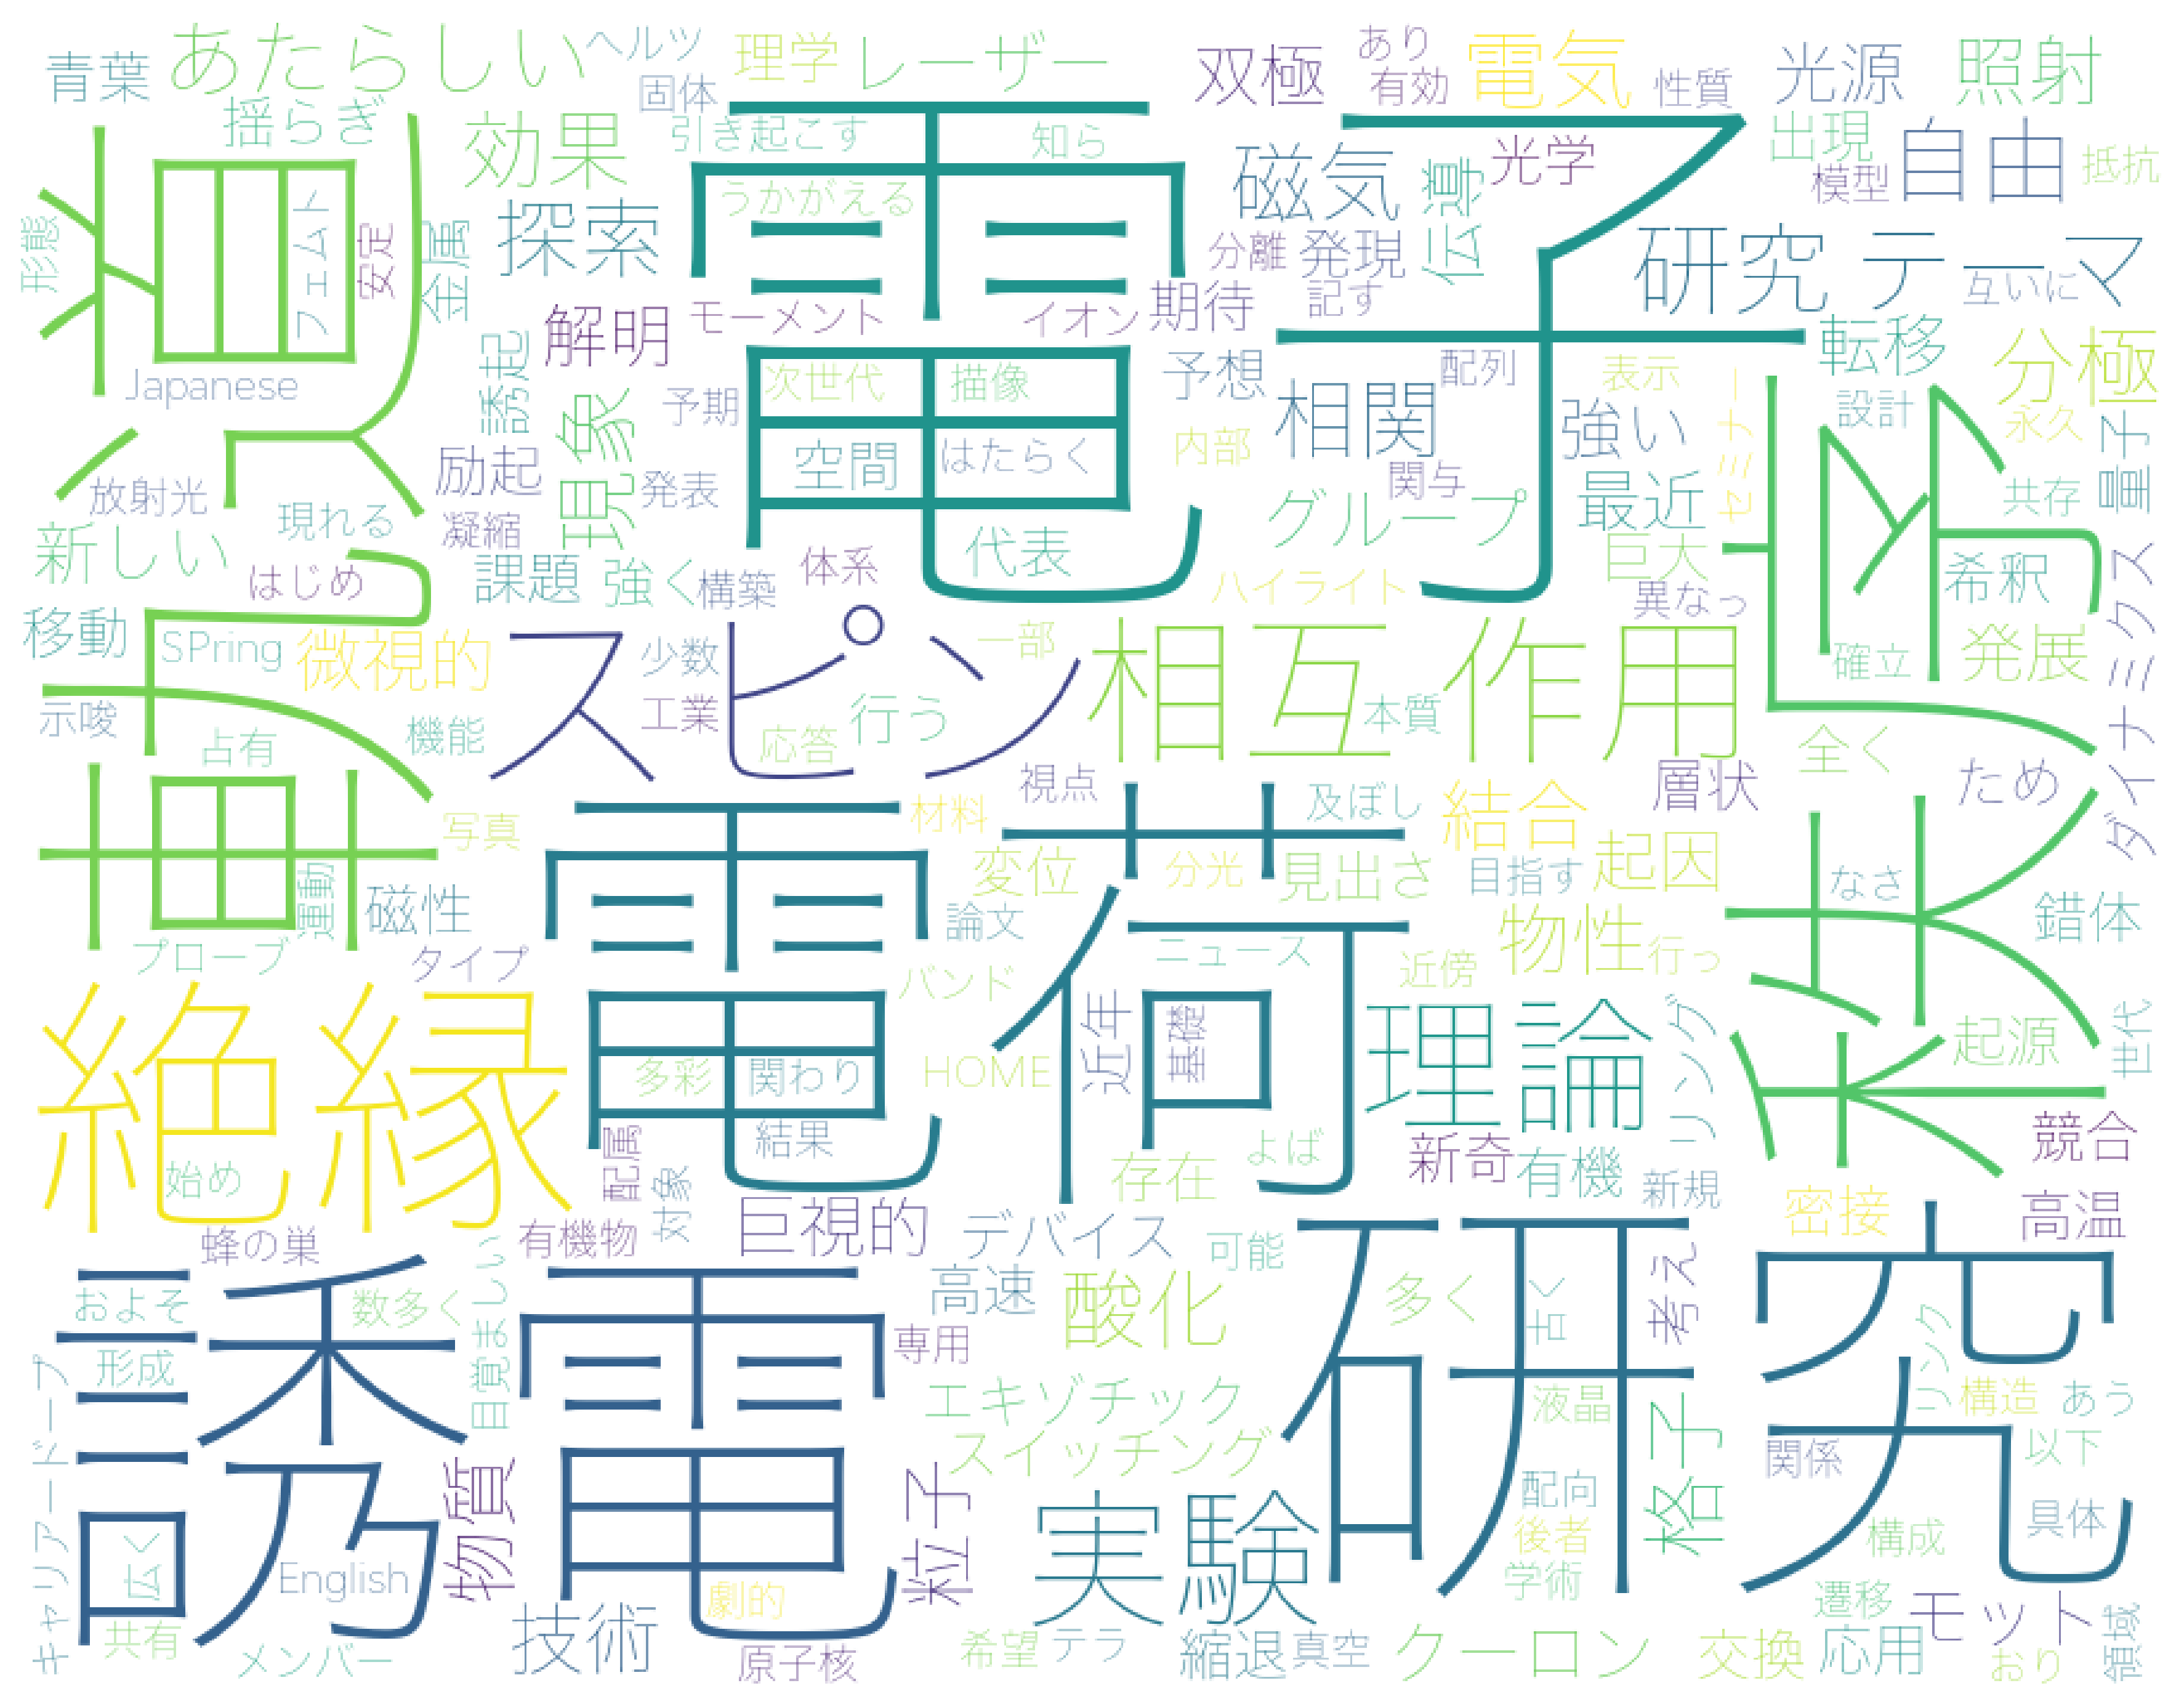

In [8]:
url = "http://www.cmpt.phys.tohoku.ac.jp/~ishihara/research_ja.html"
wordlist = get_wordlist_from_QiitaURL(url)
#print(" ".join(wordlist))
create_wordcloud(" ".join(wordlist))